In [38]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [41]:
try:
 from PIL import Image
except ImportError:
 import Image
 
import cv2
import pytesseract

In [42]:
IMAGES_DIR_PATH="/content/drive/MyDrive/ANPR-dataset/images"
ANNOTATIONS_DIR_PATH="/content/drive/MyDrive/ANPR-dataset/annotations"

In [43]:
import os
images=[os.path.join(IMAGES_DIR_PATH,f) for f in os.listdir(IMAGES_DIR_PATH)]
images.sort()

In [44]:
import os
xmls=[os.path.join(ANNOTATIONS_DIR_PATH,f) for f in os.listdir(ANNOTATIONS_DIR_PATH)]
xmls.sort()

In [45]:
index=5

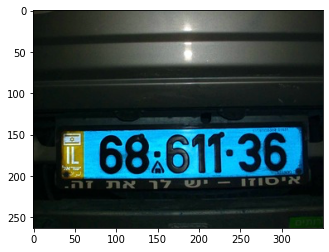

In [46]:
import cv2
img=cv2.imread(images[index])
plt.imshow(img)


# img.shape

#To view the image using opencv
# cv2.imshow("image0",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [47]:
import xml.etree.ElementTree as ET


root=ET.parse(xmls[index]).getroot()

ob=root.find('object')

xmin=int(ob.find('bndbox/xmin').text)
ymin=int(ob.find('bndbox/ymin').text)
xmax=int(ob.find('bndbox/xmax').text)
ymax=int(ob.find('bndbox/ymax').text)

box=[xmin, ymin, xmax, ymax]




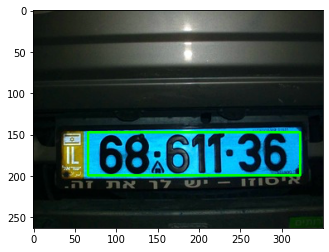

In [48]:

img=cv2.imread(images[index])
img=cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),(0,255,0),2)
plt.imshow(img)

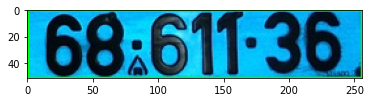

In [49]:
img_crop=img[box[1]:box[3],box[0]:box[2]]

plt.imshow(img_crop)

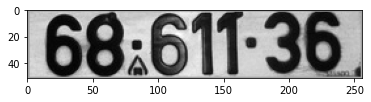

In [51]:
img_gray=cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

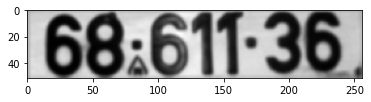

In [52]:
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
plt.imshow(img_blur,cmap="gray")

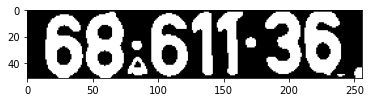

In [53]:
img_bw=cv2.threshold(img_blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)[1]
plt.imshow(img_bw, cmap="gray")

In [54]:
contours,_=cv2.findContours(img_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

print(len(contours))

18


In [55]:
pytesseract.pytesseract.tesseract_cmd =r'/usr/bin/tesseract'

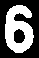

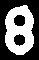

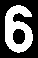

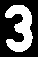

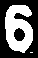

6361136


In [57]:
# from pytesseract import image_to_string as im_2_st
from pytesseract import image_to_string
from google.colab.patches import cv2_imshow

answer=""
for cont in contours:
    x,y,w,h=cv2.boundingRect(cont)
    
    img_h,img_w=img_bw.shape
    
    
    ratio = h / float(w)
    if ratio < 1.5:
      # print("r "+str(ratio))
      continue
        
    area = h * w
    if area < 100:
      # print("a "+str(area))
      continue
        
    roi=img_bw[y:y+h,x:x+w]
    
    roi=cv2.copyMakeBorder(roi,5,5,5,5,cv2.BORDER_CONSTANT,value=[0,0,0])
    text=image_to_string(roi,config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3')
    answer+=text[0]

    cv2_imshow(roi)
    
    
print(answer)